# Random Forest

### Modelo 1 - Frequency of words

##### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import feather

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectPercentile, f_classif

#### Read FTR

In [2]:
#read ftr
train_m1 = pd.read_feather( '../dataset/train_m1.ftr', columns=None, use_threads=True)

In [3]:
train_m1 = train_m1.drop(columns=['level_0'])
train_m1.head()

,like,good,one,taste,great,coffee,flavor,tea,product,love,...,pliers,offshoot,distinctively,brilliance,auspices,synonyms,cowards,lofted,parachute,polarityClass
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,2,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,2
4,2,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [4]:
#read ftr
test_m1 = pd.read_feather( '../dataset/test_m1.ftr', columns=None, use_threads=True)

In [5]:
test_m1 = test_m1.drop(columns=['level_0'])
test_m1.head()

,like,good,one,taste,great,coffee,flavor,tea,product,love,...,pliers,offshoot,distinctively,brilliance,auspices,synonyms,cowards,lofted,parachute,polarityClass
0,0,1,2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
1,1,1,1,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,4,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [6]:
#get target
train_m1_target = train_m1['polarityClass']
train_m1 = train_m1.drop(columns=['polarityClass']) 

In [7]:
#get target
test_m1_target = test_m1['polarityClass']
test_m1 = test_m1.drop(columns=['polarityClass']) 

### Check for lower errors

In [8]:
error_rate = []

for i in tqdm(range(1,150)):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(train_m1,train_m1_target)
    predictions = clf.predict(test_m1)
    error_rate.append(np.mean(predictions != test_m1_target))

100%|█████████████████████████████████████████████████████████████████████████████| 149/149 [6:16:39<00:00, 151.67s/it]


Text(0, 0.5, 'Error Rate')

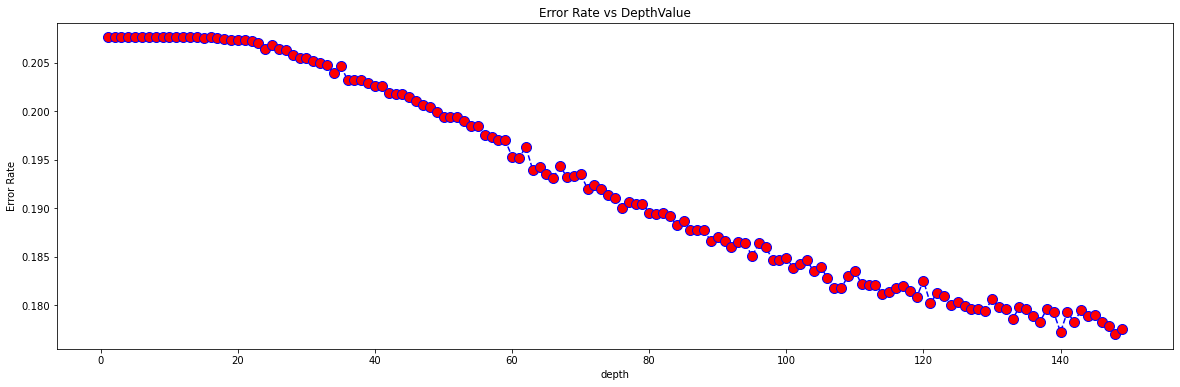

In [12]:
plt.figure(figsize=(20,6))
plt.plot(range(1,150),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

### Hyperparameter tuning using GridSearchCV

In [ ]:
# Create the parameter grid based on the results of random search 
parameters = {
    'bootstrap': [True],
    'max_depth': [140, 149],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create the model
rf_model = RandomForestClassifier()

# Best model
opt_model_rf = GridSearchCV(rf_model, parameters,  scoring='accuracy', verbose=1)

# Fit the model
opt_model_rf.fit(train_m1, train_m1_target)

print (opt_model_rf.best_estimator_)

### Create and fit the model

In [ ]:
# Create model with best parameters
rf_best_model = RandomForestClassifier(max_depth=97) #, max_features=2, min_samples_leaf=3, min_samples_split=8)

# Fit the best model
rf_best_model.fit(train_m1, train_m1_target)
rf_best_model

In [ ]:
predictions = rf_best_model.predict(test_m1)# Calculate the absolute errors

# Confusion matrix
confusion = pd.crosstab(test_m1_target,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

In [ ]:
# Accuracy
score = accuracy_score(test_m1_target,predictions)
print('Accuracy:{0:f}'.format(score))

In [ ]:
# Report
print(classification_report(test_m1_target,predictions))

In [ ]:
# Validate model using best model and cross validation
pecc_rf = cross_val_score(rf_best_model, train_m1, train_m1_target, cv = 5).mean()
pecc_rf

## Modelo 2 - Existence of words

#### Read FTR

In [ ]:
#read ftr
train_m2 = pd.read_feather( '../dataset/train_m2.ftr', columns=None, use_threads=True)

In [ ]:
train_m2 = train_m2.drop(columns=['level_0'])
train_m2.head()

In [ ]:
#read ftr
test_m2 = pd.read_feather( '../dataset/test_m2.ftr', columns=None, use_threads=True)

In [ ]:
test_m2 = test_m2.drop(columns=['level_0'])
test_m2.head()

In [ ]:
#get target
train_m2_target = train_m2['polarityClass']
train_m2 = train_m2.drop(columns=['polarityClass'])

In [ ]:
#get target
test_m2_target = test_m2['polarityClass']
test_m2 = test_m2.drop(columns=['polarityClass']) 

### Check for lower errors

In [ ]:
error_rate = []

for i in tqdm(range(1,150)):
    clf = RandomForestClassifier(max_depth=i, random_state=0)
    clf.fit(train_m2,train_m2_target)
    predictions = clf.predict(test_m2)
    error_rate.append(np.mean(predictions != test_m2_target))

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(range(1,150),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs DepthValue')
plt.xlabel("depth")
plt.ylabel("Error Rate")

### Hyperparameter tuning using GridSearchCV

In [ ]:
# Create the parameter grid based on the results of random search 
parameters = {
    'bootstrap': [True],
    'max_depth': [140, 149],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Create the model
rf_model = RandomForestClassifier()

# Best model
opt_model_rf = GridSearchCV(rf_model, parameters,  scoring='accuracy', verbose=1)

# Fit the model
opt_model_rf.fit(train_m2, train_m2_target)

print (opt_model_rf.best_estimator_)

### Create and fit the model

In [ ]:
# Create model with best parameters
rf_best_model = RandomForestClassifier(max_depth=97) #, max_features=2, min_samples_leaf=3, min_samples_split=8)

# Fit the best model
rf_best_model.fit(train_m2, train_m2_target)
rf_best_model

In [ ]:
predictions = rf_best_model.predict(test_m2)# Calculate the absolute errors

# Confusion matrix
confusion = pd.crosstab(test_m2_target,predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusion )

In [ ]:
# Accuracy
score = accuracy_score(test_m2_target,predictions)
print('Accuracy:{0:f}'.format(score))

In [ ]:
# Report
print(classification_report(test_m2_target,predictions))

In [ ]:
# Validate model using best model and cross validation
pecc_rf = cross_val_score(rf_best_model, train_m2, train_m2_target, cv = 5).mean()
pecc_rf